# Deep Hallucination Classification

***Lăzăroiu Teodora-Bianca, grupa 241***

## 1. Încărcarea și preprocesarea datelor

Pentru toate modele utilizate în continuare, datele sunt încărcate cu ajutorul folosing librăriile *numpy*, *glob* și *cv2* din python. Pentru fiecare set de date sunt citite numele imaginilor din fișierul text corespunzător și sunt încărcate imaginile din folderele corespunzătoare. După încărcarea imaginilor în program vom avea următorul set de date:

- **Date de antrenare**: 8000 de imagini și etichetele acestora
- **Date de validare**: 1173 de imagini și etichetele acestora
- **Date de testare**: 2819 de imagini fără etichete

Pentru creșterea nivelului de acuratețe a modelelor folosite am folosit mai multe modalități de manipulare a datelor cu scopul de perfecționa procesul de învățare automată a modelului folosit în program. Pentru fiecare metodă de modelare a datelor vom observa și influența pe care a avut-o asupra scorului obținut de fiecare clasificator în parte.

### 1.1. Colorarea alb negru

Una dintre metodele de preprocesare folosite a fost transformarea tuturor imaginilor din formatul RGB în grayscale și antrenarea modelului. Pentru acestă transformare am folosit metoda **color.rgb2grayscale** din modulul **cv2**. Funcția **flatten** normalizează formatul imaginii pentru a putea fi încărcat ulterior de modelul nostru.

In [ ]:
import numpy as np
import glob
import cv2

train_images_gray = []
for im in glob.glob("train+validation\*.png"):
    im_name = im.lstrip(r"train+validation\ ")
    if im_name in train_images_names:
        im = color.rgb2gray(cv2.imread(im))
        train_images_gray.append(im.flatten())

### 1.2. Normalizarea imaginilor

O altă metodă de modificare a datelor de intrare este normalizarea min-max. Acestă metodă de preprocesare a datelor restrânge valorile datelor astfel încât acestea vor fi cuprinse în intervalul [0,1] prin aplicarea formulei de calcul: **(valoare - minim) / (maxim - minim)**. Funcția **flatten** normalizează formatul imaginii pentru a putea fi încărcat ulterior de modelul nostru.

In [ ]:
import numpy as np
import glob
import cv2

train_images_normalized = []
for im in glob.glob("train+validation\*.png"):
    im_name = im.lstrip(r"train+validation\ ")
    if im_name in train_images_names:
        im = cv2.imread(im)
        im = (im - np.min(im)) / (np.max(im) - np.min(im))
        train_images_normalized.append(im.flatten())

### 1.3. Rotirea imaginilor

Cea de a treia metodă de preprocesare folosită a fost rotirea imaginilor date la 90 de grade cu ajutorul funcției **ROTATE_90_CLOCKWISE** din librăria **cv2**. Funcția **flatten** normalizează formatul imaginii pentru a putea fi încărcat ulterior de modelul nostru.

In [ ]:
train_images_rotated = []
for im in glob.glob("train+validation\*.png"):
    im_name = im.lstrip(r"train+validation\ ")
    if im_name in train_images_names:
        # rotirea imaginii la 90 de grade spre drepta
        im = cv2.imread(im, cv2.ROTATE_90_CLOCKWISE)
        train_images_rotated.append(im.flatten())

### 1.4. Inversarea imaginilor

Ultima metodă de modificare a imaginilor este răsturnarea acestora pe plan vertical, după axa lui X. Acestă transformare este realizată cu ajutorul funcției **flip()** din librăria **cv2**. De asemenenea, este folosită și funcția **flatten** pentru a normaliza forma imaginii.

In [ ]:
train_images_flipped = []
for im in glob.glob("train+validation\*.png"):
    im_name = im.lstrip(r"train+validation\ ")
    if im_name in train_images_names:
        im = cv2.imread(im)
        # rotirea imaginii pe verticala
        im = cv2.flip(im, 0)
        train_images_flipped.append(im.flatten())

## 2. Clasificarea datelor

### 2.1 Naive Bayes

Clasificatorul Naive Bayes se bazează pe teorema lui Bayes și calculează pentru fiecare imagine probabilitatea de a face parte dintr-o anumită clasă. Astfel, probabilitatea cea mai mare a unei imagini va determina clasa din care face parte.

In [ ]:
model = MultinomialNB()
model.fit(train_images, train_labels)
validation_predictions = model.predict(validation_images)
print("NB:", end = " ")
print(np.mean(validation_predictions == validation_labels))

- acuratețea modelului = 0.3617647058823529

### Matricea de confuzie pentru NB:

Matricea de confuzie ilustrează acuratețea predincțiilor făcute de model pentru fiecare clasă în parte. Așadar predicțiile corecte ale clasificatorui pentru fiecare clasă pot fi citite pe diagonala principală a matricei. Aceasta poate fi calculată și reprezentată în python cu ajutorul modulelor **sklearn.metrics**, respectiv **mlxtend.plotting** așa cum este prezentat în codul ce urmează.

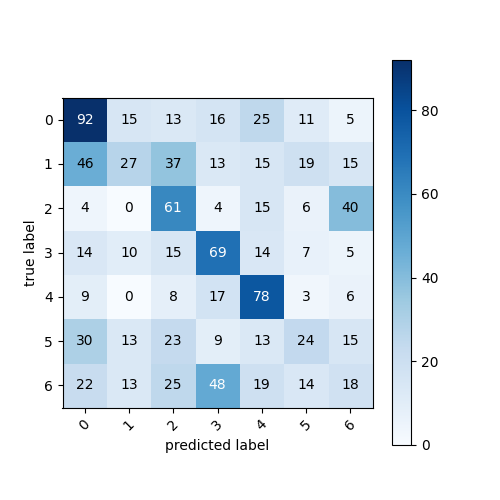

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confusion = confusion_matrix(validation_labels, validation_predictions, labels = [0,1,2,3,4,5,6])
plot_confusion_matrix(confusion, colorbar = True, class_names=[0,1,2,3,4,5,6], figsize=(5, 5))
plt.show()

### 2.2 Support Vector Machine

Clasificatorul SVM împarte datele de intrare în două categorii prin trasarea unei linii în plan și separarea obiectelor corespunzatoare fiecărei clase. În cazul unor date de intrare ce trebuie să fie clasificate în mai multe clase, implementarea din librăria **skilearn** a SVM-ului va lua pe rând toate perechile de clase posibile și va trasa în total **n*(n-1)/2** linii pentru clasificarea obiectelor, unde n este numărul de clase necesar.

In [ ]:
model = svm.SVC()
model.fit(train_images, train_labels)
validation_predictions = model.predict(validation_images)
print("SVM:", end = " ")
print(np.mean(validation_predictions == validation_labels))

- acuratețea modelului = 0.5431372549019607

### Matricea de confuzie pentru SVM:

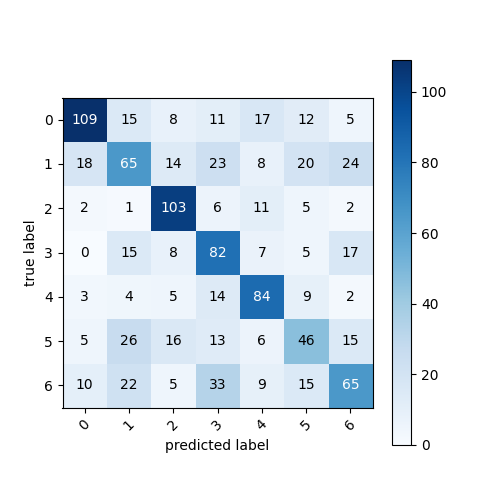

### Îmbunătățirea parametrilor

Se poate observa că acuratețea modelului crește prin modificarea parametrilor de la modelul de clasificare

- acuratețea modelului fără parametrii: 0.5431372549019607
- acuratețea modelului cu modificarea parametrilor: 0.557843137254902

In [ ]:
model = svm.SVC(C = 6)
model.fit(train_images, train_labels)
validation_predictions = model.predict(validation_images)
print("SVM:", end = " ")
print(np.mean(validation_predictions == validation_labels))

### 2.3 Multi Layer Perceptron

In [ ]:
model = MLPClassifier()
model.fit(train_images, train_labels)
validation_predictions = model.predict(validation_images)
print("MLP:", end = " ")
print(np.mean(validation_predictions == validation_labels))

- acuratețea modelului = 0.3607843137254902

### Matricea de confuzie pentru MLP:

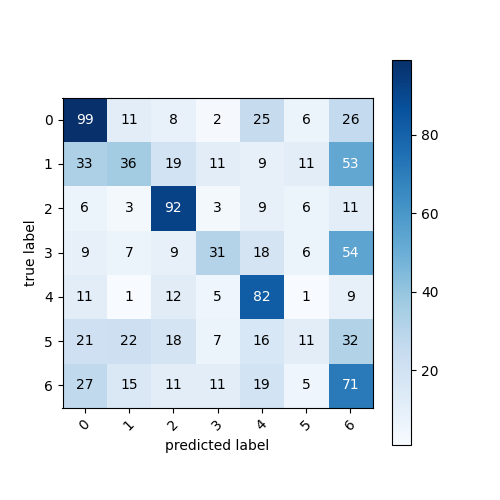

## 3. Acuratețea modelului

Prin antrenarea unui set cât mai divers de date s-a putut observa diferența de performanță în funcție de clasificatorul folosit și preprocesarea diferită a datelor de intrare. Astfel, rezultatele obținute pot fi vizualizate în următorul tabel:

<table>
  <tr>
    <th>ACCURACY</th>
    <th>NO PREPROCESSING</th>
    <th>GRAYSCALE IMAGES</th>
    <th>NORMALIZED IMAGES</th>
    <th>ROTATED IMAGES</th>
    <th>FLIPPED IMAGES</th>
  </tr>
  <tr>
    <td>NB</td>
    <td>0.3617647058823529</td>
    <td>0.2539215686274509</td>
    <td>0.3607843137254902</td>
    <td>0.2598039215686274</td>
    <td>0.3617647058823529</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.5431372549019607</td>
    <td>0.4705882352941176</td>
    <td>0.5450980392156862</td>
    <td>0.4764705882352941</td>
    <td>0.5431372549019607</td>
  </tr>
  <tr>
    <td>MLP</td>
    <td>0.3607843137254902</td>
    <td>0.4598039215686274</td>
    <td>0.5009803921568627</td>
    <td>0.3421568627450980</td>
    <td>0.4156862745098039</td>
  </tr>
</table>

De asemenea se pot observa o schimbare a performanței și prin schimbarea volumului de date de antrenare. Un astfel de exemplu este folosirea ca date de antrenare a imaginilor normal concatenate cu imaginile inversate. În acest caz datele de antrenare sunt dublate iar modelul poate învăța mai bine pentru a ajunge la o acuratețe mai mare.

<table>
  <tr>
    <th>ACCURACY</th>
    <th>FLIPPED</th>
    <th>FLIPPED + NORMAL</th>
  </tr>
  <tr>
    <td>NB</td>
    <td>0.36176470588235293</td>
    <td>0.3509803921568627</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.5431372549019607</td>
    <td>0.5490196078431373</td>
  </tr>
  <tr>
    <td>MLP</td>
    <td>0.39509803921568626</td>
    <td>0.4230392156862745</td>
  </tr>
</table>

## 4. Generarea fișierului de output

După antrenarea clasificatorului pe datele de test și calcularea acurateții pe datele de validare se pot prezice rezultatele pentru datele de test. Clasificatorul va prezice o etichetă pentru fiecare imagine iar rezultatele vor fi scrise într-un fișier de output în format csv (id,label).

In [ ]:
test_predictions = model.predict(test_images)

f = open("submission.txt", "w")
f.write("id,label\n")

for i in range(len(test_images_names)):
    string = str(test_images_names[i]).rstrip('\n') + "," + str(test_predictions[i]).rstrip('\n') + "\n"
    f.write(string)
f.close()